In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./missing_values_discovery_time_dataset.csv')

In [3]:
df_states = df[["STATE"]].rename(columns={'STATE': 'STUSPS'})
#df_states

df_states['occurrences'] = df_states.groupby('STUSPS')['STUSPS'].transform('count')
df_rollUp = df_states.drop_duplicates()

import geopandas
geo_usa = geopandas.read_file('./cb_2018_us_state_20m')
geo_merge=geo_usa.merge(df_rollUp, on='STUSPS')

df_rollUp

,STUSPS,occurrences
0,ID,7483
1,WY,2829
2,CA,37870
3,OR,12204
7,UT,6175
8,FL,18151
10,NM,7578
18,WA,6847
19,CO,6849
24,NV,3364


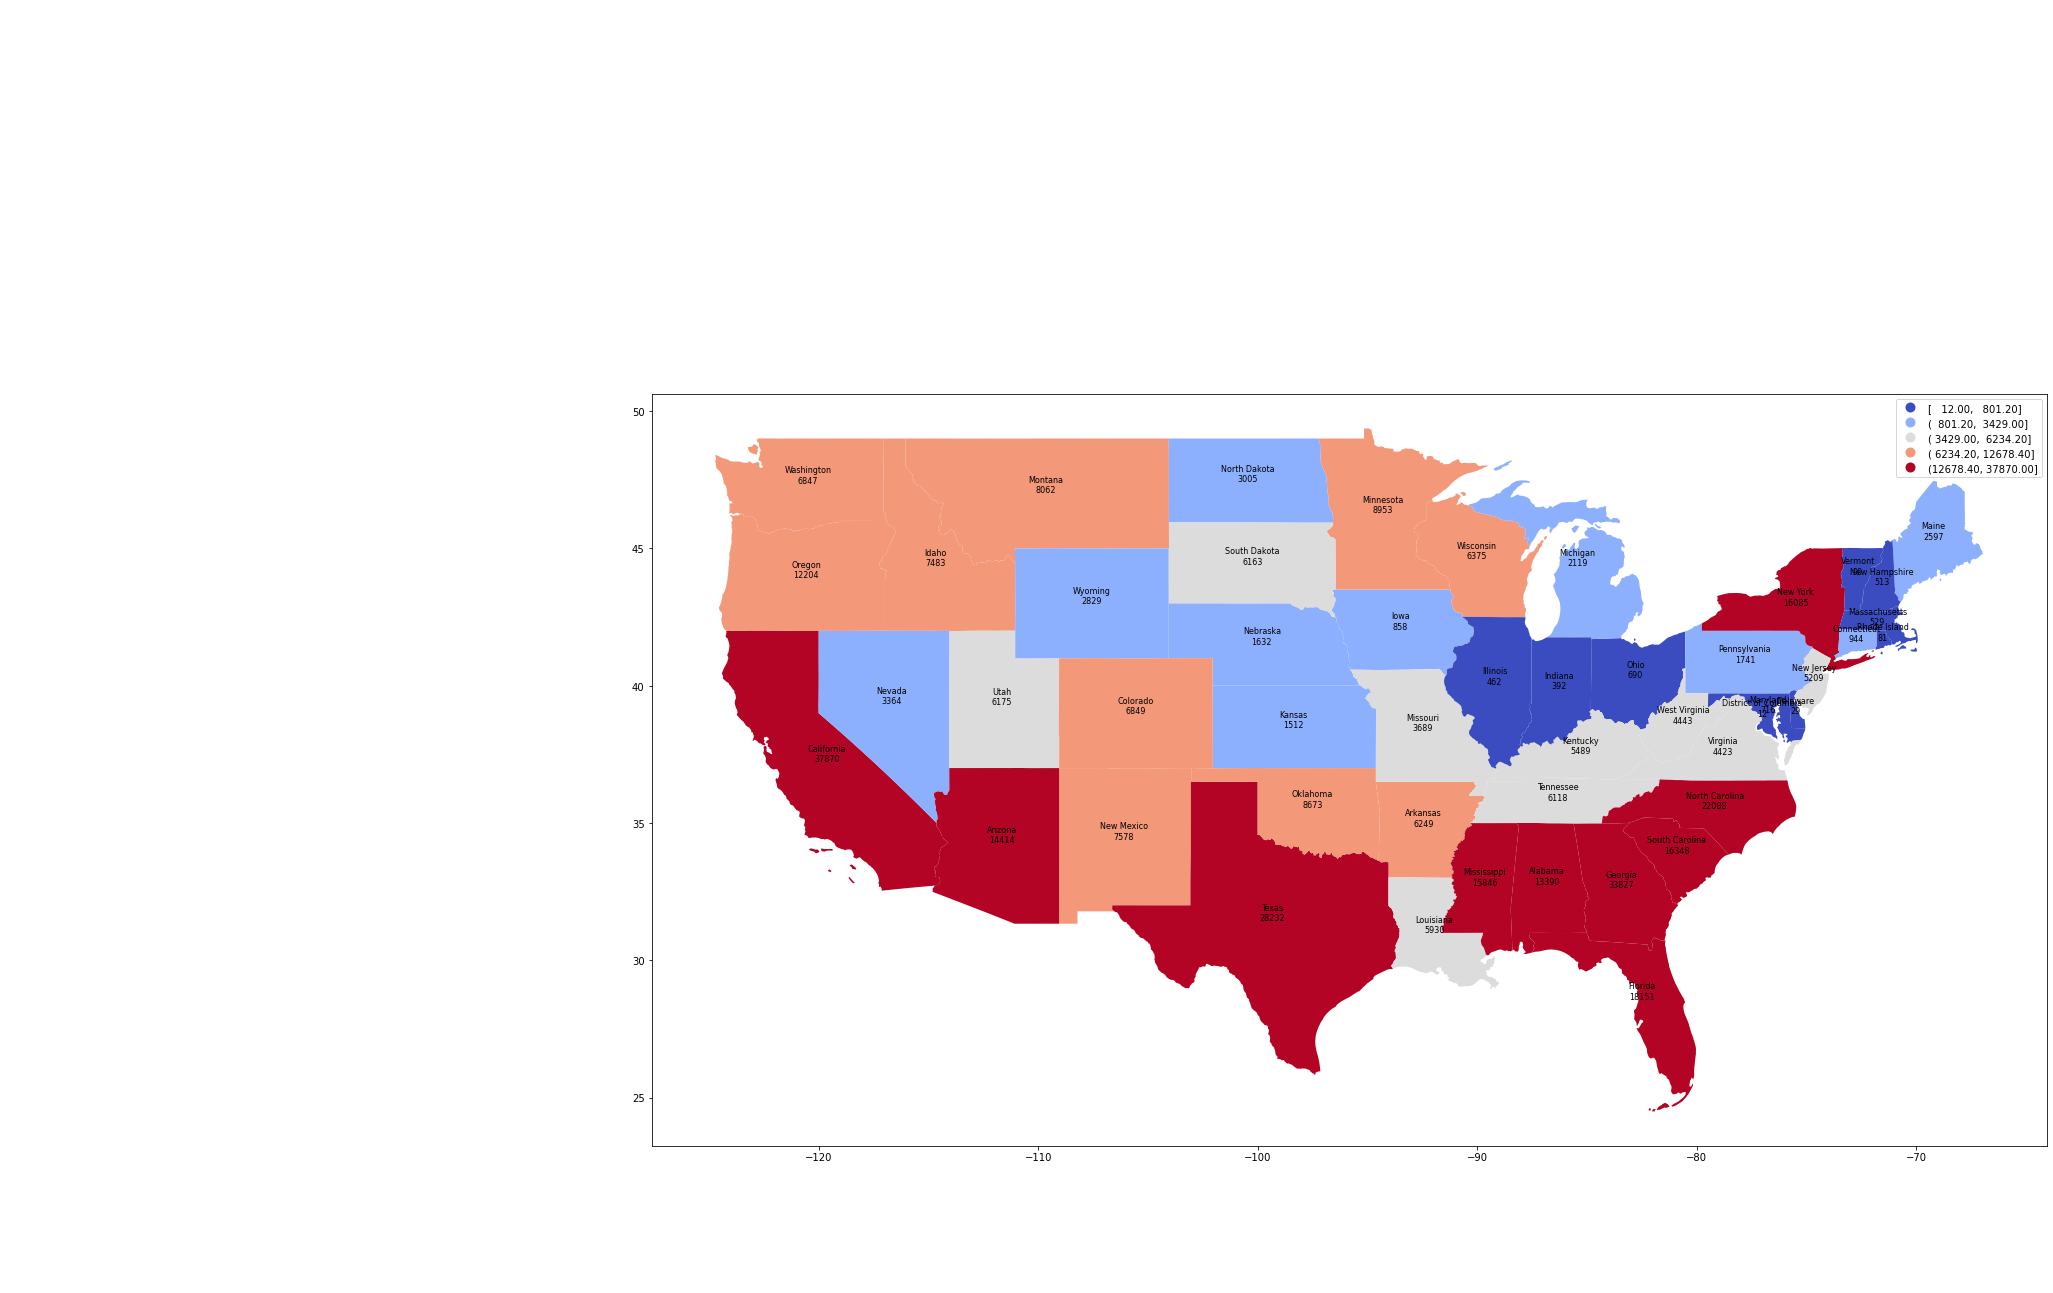

In [4]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()

geo_merge.apply(lambda x: ax.annotate(s="{}\n{}".format(x.NAME, x.occurrences), xy=x.geometry.centroid.coords[0], ha='center', fontsize=8),axis=1);
geo_merge[geo_merge['NAME'].isin(['Alaska','Hawaii', 'Puerto Rico']) == False].plot(column='occurrences', scheme="quantiles",figsize=(25, 15),legend=True,cmap='coolwarm', ax=ax)
plt.show()